In [1]:
from index_tracking import *

import yahoo_fin.stock_info as si
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import numpy as np

import pickle

%load_ext autoreload
%autoreload 1
%aimport index_tracking

In [2]:
ticker_index = "^SP100"
tickers_list = get_sp100_tickers()

n_months = 16

start_date = "2022-01-01"
end_date = "2024-01-01"

c:\Users\Arthur Araujo\localrepositories\aa-index_tracking\index_tracking.py:246: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  temp_df = pd.read_html(r.text, attrs={"id": "constituents"})


In [3]:
for i in range(len(tickers_list) - 1):
    if tickers_list[i].count(".") > 0:
        # tickers_list[i] = tickers_list[i].replace(".", "-")
        tickers_list.remove(tickers_list[i])

In [4]:
index_historical = get_ticker_data_yfinance(ticker_index, start_date, end_date)
stocks_historical = get_stocks_data_yfinance(tickers_list, start_date, end_date)

# index_historical = get_ticker_data_yfinance(ticker_index, n_months)
# stocks_historical = get_stocks_data_yfinance(tickers_list, n_months)


# index_historical = get_ticker_data_yahoofin(ticker_index, start_date, end_date)
# stocks_historical = get_stocks_data_yahoofin(tickers_list, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
# index_historical.index = index_historical.index.tz_convert("UTC")
# for dict_key in stocks_historical.keys():
#     stocks_historical[dict_key].index = stocks_historical[dict_key].index.tz_convert(
#         "UTC"
#     )

In [6]:
fill_missing_values(index_historical, stocks_historical)

In [7]:
cutoff_date = "2022-07-01"

index_historical_train, stocks_historical_train = create_train_dataset(
    index_historical, stocks_historical, cutoff_date
)

index_historical_test, stocks_historical_test = create_test_dataset(
    index_historical, stocks_historical, cutoff_date
)

Text(0, 0.5, 'Value [$]')

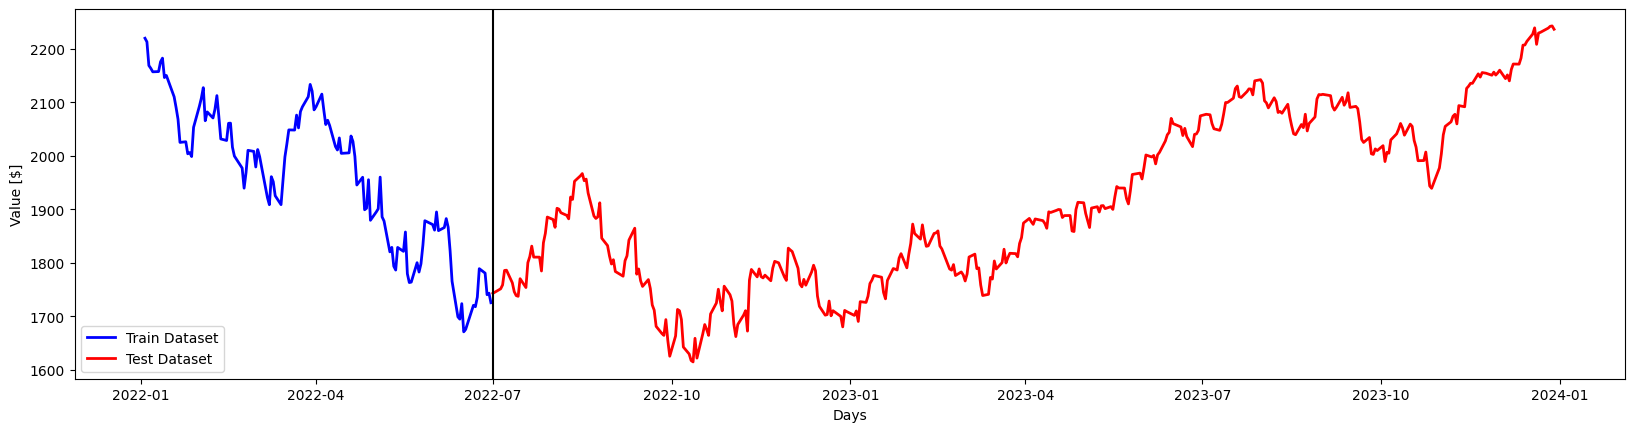

In [8]:
plt.figure().set_figwidth(20)
plt.plot(
    index_historical_train.index,
    index_historical_train,
    label="Train Dataset",
    linewidth=2,
    color="b",
)

plt.plot(
    index_historical_test.index,
    index_historical_test,
    label="Test Dataset",
    linewidth=2,
    color="r",
)

plt.axvline(x=pd.to_datetime(cutoff_date), color="black")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

## Gurobi

\begin{align*} 
min\frac{1}{T}\sum_{t=1}^T (\sum_{i \in I}w_i r_{t,i} - R_t)^2 \\ 
\end{align*}

In [9]:
# def sort_dict_by_values(d, reverse=True):
#     return {
#         k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=reverse)
#     }


# sort_dict_by_values(w1)

In [10]:
w_small_K1 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    5,
)

w_small_K1

Restricted license - for non-production use only - expires 2025-11-24


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x717d948a
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.36332428604492095,
 'ABBV': 0.19290315817308,
 'AMZN': 0.12215697978349196,
 'GM': 0.08761712928167856,
 'HON': 0.23399844671682857}

In [11]:
w_small_K2 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    4,
)

w_small_K2

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x506d0c3a
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.4202079056598287,
 'ABBV': 0.1849707824324792,
 'AMZN': 0.12964915239712674,
 'HON': 0.2651721595105654}

In [12]:
w_small_K3 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    3,
)

w_small_K3

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x6441b026
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.00 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.37314724798158433,
 'MMM': 0.2986454883733885,
 'MSFT': 0.32820726364502717}

In [13]:
w_small_K4 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    2,
)

w_small_K4

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x147cd225
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.5911017081062916, 'HON': 0.4088982918937084}

In [14]:
w0 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    50,
)
w0

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0xf0ab8c38
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 0.0002498
Presolve time: 0.01s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.09910056523775908,
 'ACN': 0.01745749593750669,
 'AMGN': 0.019747264573465685,
 'AMT': 0.018103360012022503,
 'AMZN': 0.038954626974994036,
 'AVGO': 0.012911087675525365,
 'BAC': 0.03665146084699497,
 'BLK': 0.008002938840433767,
 'C': 0.010431053059381355,
 'CHTR': 0.007605928994162878,
 'CL': 0.023138938617568907,
 'CMCSA': 0.009188915327481733,
 'COP': 0.01858483133396349,
 'COST': 0.013819259839089803,
 'CRM': 0.01729154914459034,
 'CSCO': 0.011707379639841902,
 'CVS': 0.01253475422766429,
 'DHR': 0.011783359651920119,
 'DIS': 0.026272851082152906,
 'DOW': 0.0161747464396692,
 'EMR': 0.023660475317525107,
 'GE': 0.00631561690913143,
 'GOOGL': 0.04351057545915952,
 'GS': 0.009510631878338931,
 'HD': 0.020793147408447798,
 'IBM': 0.011200025655635786,
 'INTC': 0.011822384034840793,
 'KHC': 0.0067957848480188964,
 'LLY': 0.011710831966321413,
 'MCD': 0.009483156899366957,
 'MDT': 0.012196199619747768,
 'META': 0.029754999166442413,
 'MRK': 0.027680471785821916,
 'MSFT': 0.0

In [15]:
w1 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    60,
)
w1

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x8b437c5b
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Found heuristic solution: objective 0.0002498
Presolve time: 0.01s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.09244352399049213,
 'ACN': 0.01582941529556163,
 'ADBE': 0.007423432883038881,
 'AIG': 0.0028236451661685065,
 'AMGN': 0.023302503208977497,
 'AMT': 0.010709385746236155,
 'AMZN': 0.04137069393665724,
 'AVGO': 0.006791483149276157,
 'BAC': 0.03030663909129585,
 'BK': 0.009811096861271469,
 'BKNG': 0.0037200277463774085,
 'CAT': 0.003943150349457302,
 'CHTR': 0.003932367371012764,
 'CL': 0.01912416086327336,
 'CMCSA': 0.00838837901695474,
 'COP': 0.018590035183043658,
 'COST': 0.016450738949416198,
 'CRM': 0.013777686525404184,
 'CSCO': 0.01690751294763745,
 'CVS': 0.010937461080648808,
 'DHR': 0.012896558176578522,
 'DIS': 0.023278921445262186,
 'DOW': 0.014709368502134139,
 'DUK': 0.014201870794005436,
 'F': 0.004461205536019652,
 'GE': 0.007706115602484051,
 'GOOGL': 0.04465551864007511,
 'GS': 0.01069894958631005,
 'HD': 0.012368019216045096,
 'IBM': 0.008616171486854046,
 'INTC': 0.010708207723105299,
 'JNJ': 0.014188979640110838,
 'JPM': 0.016559190296662973,
 'KHC': 0.

In [16]:
w2 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    70,
)
w2

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x4a303c4b
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.00 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.09244352399049213,
 'ACN': 0.01582941529556163,
 'ADBE': 0.007423432883038881,
 'AIG': 0.0028236451661685065,
 'AMGN': 0.023302503208977497,
 'AMT': 0.010709385746236155,
 'AMZN': 0.04137069393665724,
 'AVGO': 0.006791483149276157,
 'BAC': 0.03030663909129585,
 'BK': 0.009811096861271469,
 'BKNG': 0.0037200277463774085,
 'CAT': 0.003943150349457302,
 'CHTR': 0.003932367371012764,
 'CL': 0.01912416086327336,
 'CMCSA': 0.00838837901695474,
 'COP': 0.018590035183043658,
 'COST': 0.016450738949416198,
 'CRM': 0.013777686525404184,
 'CSCO': 0.01690751294763745,
 'CVS': 0.010937461080648808,
 'DHR': 0.012896558176578522,
 'DIS': 0.023278921445262186,
 'DOW': 0.014709368502134139,
 'DUK': 0.014201870794005436,
 'F': 0.004461205536019652,
 'GE': 0.007706115602484051,
 'GOOGL': 0.04465551864007511,
 'GS': 0.01069894958631005,
 'HD': 0.012368019216045096,
 'IBM': 0.008616171486854046,
 'INTC': 0.010708207723105299,
 'JNJ': 0.014188979640110838,
 'JPM': 0.016559190296662973,
 'KHC': 0.

In [17]:
w3 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    90,
)
w3

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0xc395491f
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.00 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

{'AAPL': 0.09244352399049213,
 'ACN': 0.01582941529556163,
 'ADBE': 0.007423432883038881,
 'AIG': 0.0028236451661685065,
 'AMGN': 0.023302503208977497,
 'AMT': 0.010709385746236155,
 'AMZN': 0.04137069393665724,
 'AVGO': 0.006791483149276157,
 'BAC': 0.03030663909129585,
 'BK': 0.009811096861271469,
 'BKNG': 0.0037200277463774085,
 'CAT': 0.003943150349457302,
 'CHTR': 0.003932367371012764,
 'CL': 0.01912416086327336,
 'CMCSA': 0.00838837901695474,
 'COP': 0.018590035183043658,
 'COST': 0.016450738949416198,
 'CRM': 0.013777686525404184,
 'CSCO': 0.01690751294763745,
 'CVS': 0.010937461080648808,
 'DHR': 0.012896558176578522,
 'DIS': 0.023278921445262186,
 'DOW': 0.014709368502134139,
 'DUK': 0.014201870794005436,
 'F': 0.004461205536019652,
 'GE': 0.007706115602484051,
 'GOOGL': 0.04465551864007511,
 'GS': 0.01069894958631005,
 'HD': 0.012368019216045096,
 'IBM': 0.008616171486854046,
 'INTC': 0.010708207723105299,
 'JNJ': 0.014188979640110838,
 'JPM': 0.016559190296662973,
 'KHC': 0.

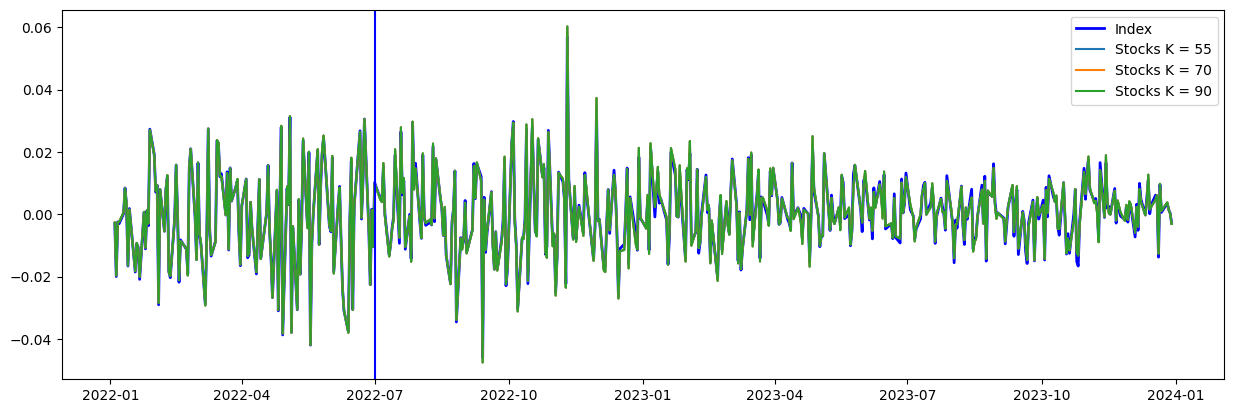

In [18]:
plt.figure().set_figwidth(15)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_index_return(index_historical),
    label="Index",
    linewidth=2,
    color="b",
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w1, index_historical),
    label="Stocks K = " + str(55),
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w2, index_historical),
    label="Stocks K = " + str(70),
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w3, index_historical),
    label="Stocks K = " + str(90),
)


plt.axvline(x=pd.to_datetime(cutoff_date), color="b")


plt.legend()

Text(0, 0.5, 'Return [$]')

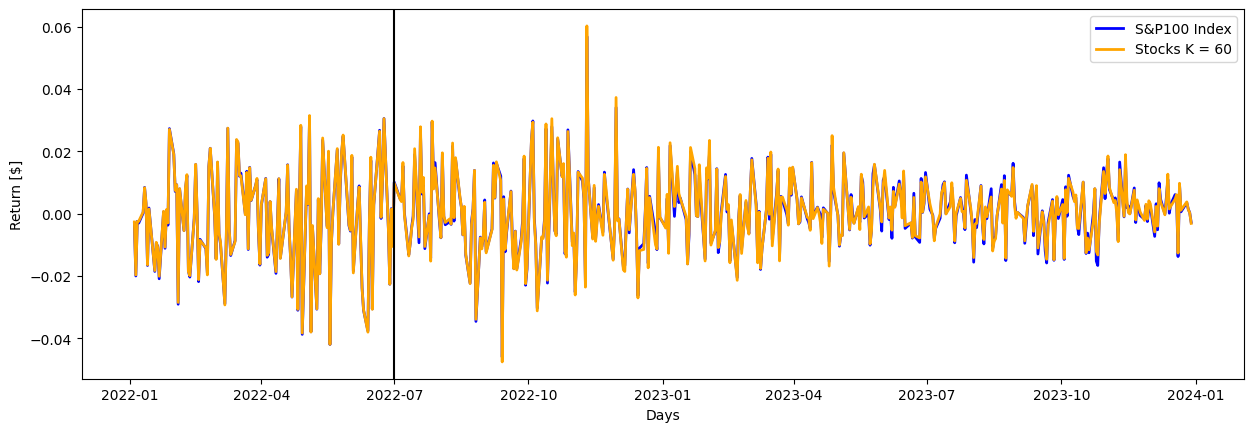

In [19]:
plt.figure().set_figwidth(15)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_index_return(index_historical),
    label="S&P100 Index",
    linewidth=2,
    color="b",
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w1, index_historical),
    label="Stocks K = " + str(60),
    linewidth=2,
    color="orange",
)


plt.axvline(x=pd.to_datetime(cutoff_date), color="black")


plt.legend()
plt.xlabel("Days")
plt.ylabel("Return [$]")

Text(0, 0.5, 'Value [$]')

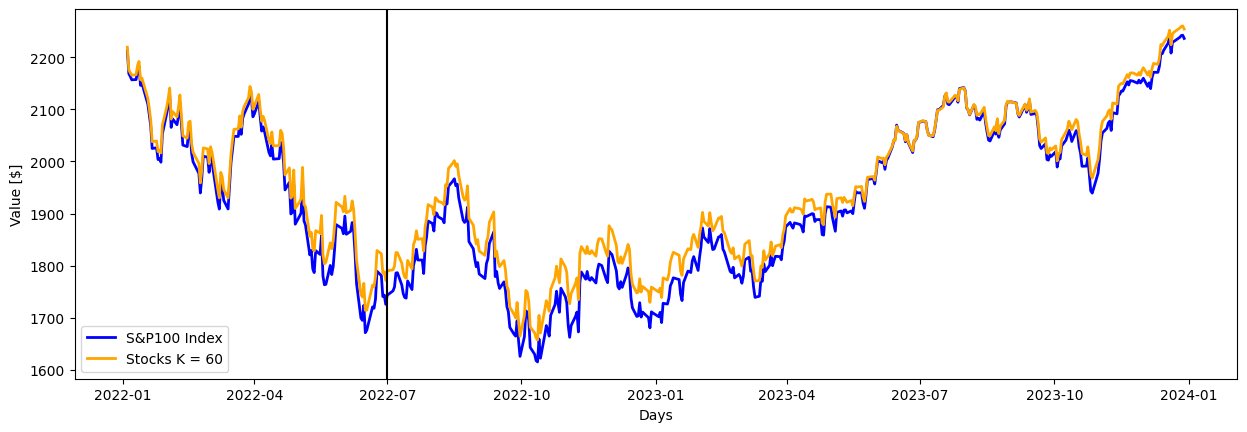

In [20]:
plt.figure().set_figwidth(15)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    index_historical.drop(index_historical.index[0]),
    label="S&P100 Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_accumulated_return(stocks_historical, w1, index_historical),
    label="Stocks K = " + str(60),
    linewidth=2,
    color="orange",
)

plt.axvline(x=pd.to_datetime(cutoff_date), color="black")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

### TEST DATASET ONLY:

Text(0, 0.5, 'Return [$]')

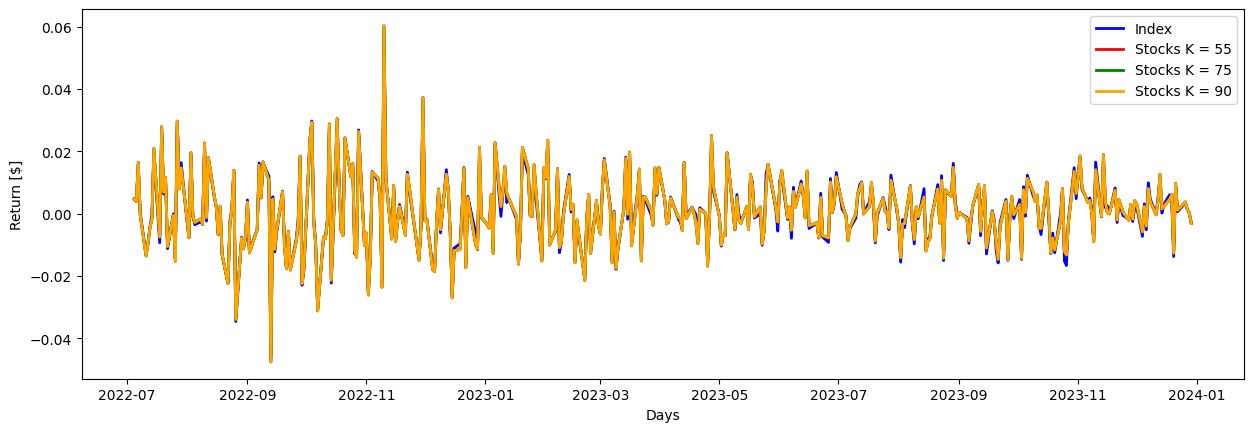

In [21]:
plt.figure().set_figwidth(15)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_index_return(index_historical_test),
    label="Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w1, index_historical_test),
    label="Stocks K = " + str(55),
    linewidth=2,
    color="red",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w2, index_historical_test),
    label="Stocks K = " + str(75),
    linewidth=2,
    color="green",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w3, index_historical_test),
    label="Stocks K = " + str(90),
    linewidth=2,
    color="orange",
)


plt.legend()
plt.xlabel("Days")
plt.ylabel("Return [$]")

Text(0, 0.5, 'Value [$]')

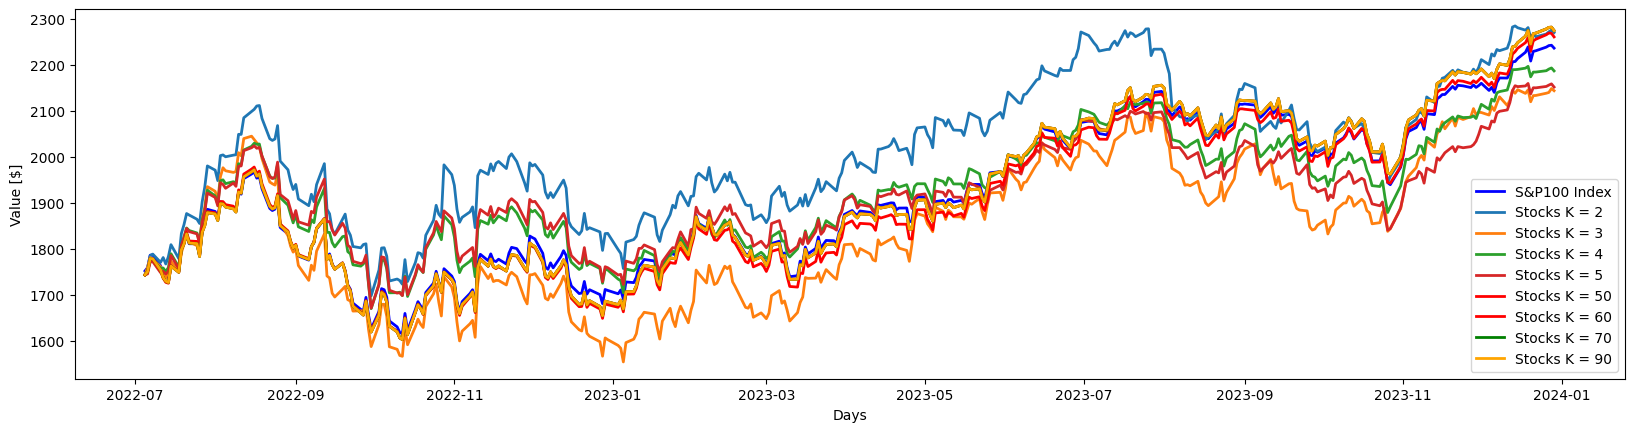

In [22]:
plt.figure().set_figwidth(20)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    index_historical_test.drop(index_historical_test.index[0]),
    label="S&P100 Index",
    linewidth=2,
    color="b",
)


plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K4, index_historical_test
    ),
    label="Stocks K = " + str(2),
    linewidth=2,
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K3, index_historical_test
    ),
    label="Stocks K = " + str(3),
    linewidth=2,
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K2, index_historical_test
    ),
    label="Stocks K = " + str(4),
    linewidth=2,
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K1, index_historical_test
    ),
    label="Stocks K = " + str(5),
    linewidth=2,
)


plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w0, index_historical_test
    ),
    label="Stocks K = " + str(50),
    linewidth=2,
    color="red",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w1, index_historical_test
    ),
    label="Stocks K = " + str(60),
    linewidth=2,
    color="red",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w2, index_historical_test
    ),
    label="Stocks K = " + str(70),
    linewidth=2,
    color="green",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w3, index_historical_test
    ),
    label="Stocks K = " + str(90),
    linewidth=2,
    color="orange",
)


plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

In [38]:
# Export to csv
df_w1 = pd.DataFrame.from_dict(w0, orient="index", columns=["W"])
df_w1.insert(0, "K", "50")
df_w1 = df_w1.rename_axis("Ticker").reset_index()
df_w1 = df_w1.set_index(["K", "Ticker"])

df_w2 = pd.DataFrame.from_dict(w1, orient="index", columns=["W"])
df_w2.insert(0, "K", "60")
df_w2 = df_w2.rename_axis("Ticker").reset_index()
df_w2 = df_w2.set_index(["K", "Ticker"])

df_w3 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w3.insert(0, "K", "70")
df_w3 = df_w3.rename_axis("Ticker").reset_index()
df_w3 = df_w3.set_index(["K", "Ticker"])

df_w4 = pd.DataFrame.from_dict(w3, orient="index", columns=["W"])
df_w4.insert(0, "K", "90")
df_w4 = df_w4.rename_axis("Ticker").reset_index()
df_w4 = df_w4.set_index(["K", "Ticker"])

df_w_small_K1 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K1.insert(0, "K", "5")
df_w_small_K1 = df_w_small_K1.rename_axis("Ticker").reset_index()
df_w_small_K1 = df_w_small_K1.set_index(["K", "Ticker"])

df_w_small_K2 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K2.insert(0, "K", "4")
df_w_small_K2 = df_w_small_K2.rename_axis("Ticker").reset_index()
df_w_small_K2 = df_w_small_K2.set_index(["K", "Ticker"])

df_w_small_K3 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K3.insert(0, "K", "3")
df_w_small_K3 = df_w_small_K3.rename_axis("Ticker").reset_index()
df_w_small_K3 = df_w_small_K3.set_index(["K", "Ticker"])

df_w_small_K4 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K4.insert(0, "K", "2")
df_w_small_K4 = df_w_small_K4.rename_axis("Ticker").reset_index()
df_w_small_K4 = df_w_small_K4.set_index(["K", "Ticker"])


df = pd.concat(
    [
        df_w_small_K1,
        df_w_small_K2,
        df_w_small_K3,
        df_w_small_K4,
        df_w1,
        df_w2,
        df_w3,
        df_w4,
    ],
    ignore_index=False,
)
df.to_csv("SP100.csv", index=True)
df

W
K  Ticker          
5  AAPL    0.092444
   ACN     0.015829
   ADBE    0.007423
   AIG     0.002824
   AMGN    0.023303
...             ...
90 UNP     0.008260
   UPS     0.010532
   V       0.026371
   WMT     0.007922
   XOM     0.007399

[470 rows x 1 columns]

# DIF TRAIN PERIOD

In [23]:
cutoff_date = "2022-04-01"

index_historical_train, stocks_historical_train = create_train_dataset(
    index_historical, stocks_historical, cutoff_date
)

#### Models for k = 55 , 70 , 90

In [24]:
w12 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    50,
)

# w22 = create_gurobi_model(
#     tickers_list,
#     index_historical_train,
#     stocks_historical_train,
#     70,
# )

# w32 = create_gurobi_model(
#     tickers_list,
#     index_historical_train,
#     stocks_historical_train,
#     90,
# )

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0xf48ed828
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-06, 6e-04]
  QObjective range [9e-08, 4e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 0.0001177
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 2.750229e-08, 778 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

Text(0, 0.5, 'Return [$]')

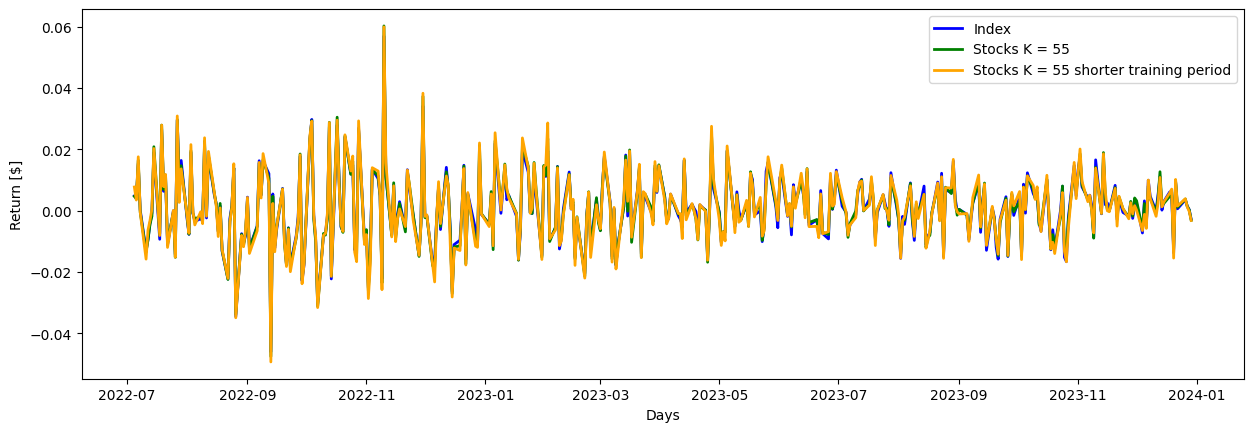

In [25]:
plt.figure().set_figwidth(15)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_index_return(index_historical_test),
    label="Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w1, index_historical_test),
    label="Stocks K = " + str(55),
    linewidth=2,
    color="green",
)
""" plt.plot(


    (index_historical_test.drop(index_historical_test.index[0])).index,


    get_all_selected_stocks_return(stocks_historical_test, w2, index_historical_test),


    label="Stocks K = " + str(75),
)
plt.plot(


    (index_historical_test.drop(index_historical_test.index[0])).index,


    get_all_selected_stocks_return(stocks_historical_test, w3, index_historical_test),


    label="Stocks K = " + str(90),
) """

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w12, index_historical_test),
    label="Stocks K = " + str(55) + " shorter training period",
    linewidth=2,
    color="orange",
)
""" plt.plot(


    (index_historical_test.drop(index_historical_test.index[0])).index,


    get_all_selected_stocks_return(stocks_historical_test, w22, index_historical_test),


    label="Stocks K = " + str(75) + ' shorter training period',
)
plt.plot(


    (index_historical_test.drop(index_historical_test.index[0])).index,


    get_all_selected_stocks_return(stocks_historical_test, w32, index_historical_test),


    label="Stocks K = " + str(90) + ' shorter training period', 
)"""


plt.legend()
plt.xlabel("Days")
plt.ylabel("Return [$]")

Text(0, 0.5, 'Value [$]')

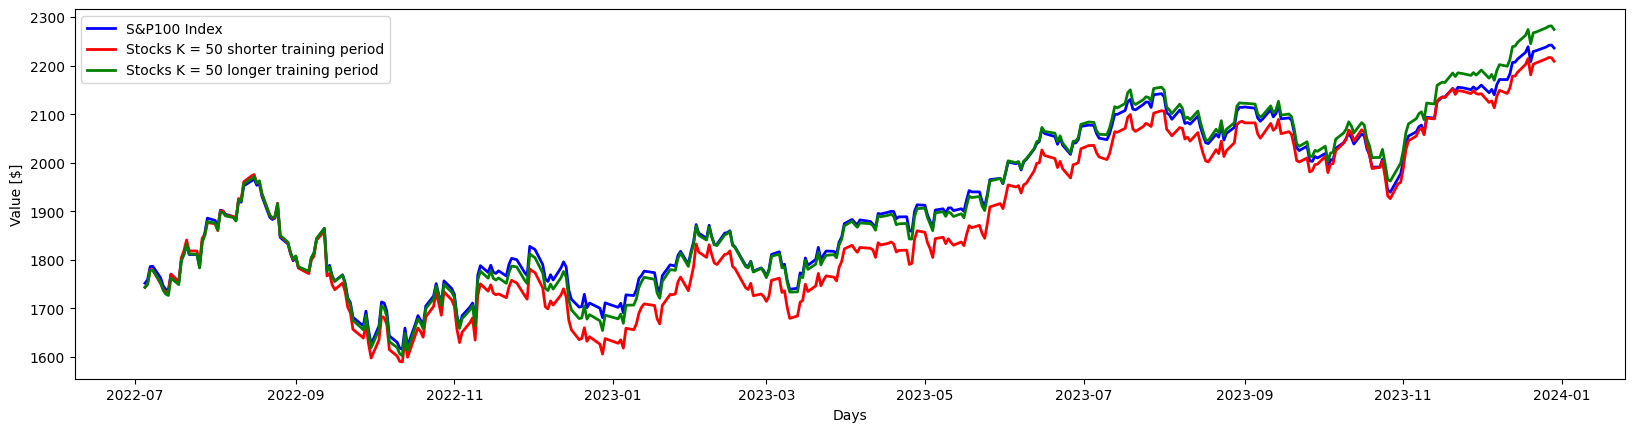

In [26]:
plt.figure().set_figwidth(20)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    index_historical_test.drop(index_historical_test.index[0]),
    label="S&P100 Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w12, index_historical_test
    ),
    label="Stocks K = " + str(50) + " shorter training period",
    linewidth=2,
    color="red",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w1, index_historical_test
    ),
    label="Stocks K = " + str(50) + " longer training period",
    linewidth=2,
    color="green",
)


plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

# Gurobi model with value limit 

In [27]:
# max_value = 10000  # Value in of dollars

In [28]:
# stocks_to_buy = buy_exact_stocks(max_value, w1, get_last_quotes(w1.keys()))
# stocks_to_buy

In [29]:
# def calculate_total_price(stocks_to_buy, prices):
#     total_price = sum(stocks_to_buy[stock] * prices[stock] for stock in stocks_to_buy)
#     return total_price


# total_price = calculate_total_price(
#     stocks_to_buy, get_last_quotes(stocks_to_buy.keys())
# )
# print("Total price:", total_price)

In [30]:
# plt.figure().set_figwidth(10)
# plt.plot(
#     (index_historical_test.drop(index_historical_test.index[0])).index,
#     get_index_return(index_historical_test),
#     label="Index",
#     linewidth=2,
#     color="b",
# )

# plt.plot(
#     (index_historical_test.drop(index_historical_test.index[0])).index,
#     get_all_selected_stocks_return(
#         stocks_historical_test, normalize_stocks(stocks_to_buy), index_historical_test
#     ),
#     label="Stocks K = " + str(55) + " Max $ = " + str(max_value),
#     linewidth=2,
#     color="orange",
# )


# plt.legend()
# plt.xlabel("Days")
# plt.ylabel("Return [$]")

In [31]:
# plt.figure().set_figwidth(15)
# plt.plot(
#     (index_historical_test.drop(index_historical_test.index[0])).index,
#     index_historical_test.drop(index_historical_test.index[0]),
#     label="S&P100 Index",
#     linewidth=2,
#     color="b",
# )

# plt.plot(
#     (index_historical_test.drop(index_historical_test.index[0])).index,
#     get_all_selected_stocks_accumulated_return(stocks_historical_test, normalize_stocks(stocks_to_buy), index_historical_test),
#     label="Stocks K = " + str(60),
#     linewidth=2,
#     color="orange",
# )

# plt.legend()
# plt.xlabel("Days")
# plt.ylabel("Value [$]")

# Model with Asset allocation

In [32]:
def create_period_dataset(index_historical, stocks_historical, start_date, end_date):
    index_historical_train = index_historical[start_date:end_date]

    stocks_historical_train = {}
    for dict_key in stocks_historical.keys():
        stocks_historical_train[dict_key] = stocks_historical[dict_key][
            start_date:end_date
        ]

    return index_historical_train, stocks_historical_train

In [33]:
n_months = 4

cutoff_dates = [
    "2022-07-01",
    "2022-11-01",
    "2023-03-01",
    "2023-07-01",
    "2023-11-01",
    "2024-01-01",
]

index_stocks_train_P = [None] * 5
index_stocks_test_P = [None] * 5

for i in range(5):

    index_historical_train, stocks_historical_train = create_train_dataset(
        index_historical, stocks_historical, cutoff_dates[i]
    )

    index_historical_period, stocks_historical_period = create_period_dataset(
        index_historical, stocks_historical, cutoff_dates[i], cutoff_dates[i + 1]
    )

    index_stocks_train_P[i] = index_historical_train, stocks_historical_train
    index_stocks_test_P[i] = index_historical_period, stocks_historical_period

In [34]:
w_allocation = []
for i in range(5):
    w_allocation.append(
        create_gurobi_model(
            tickers_list,
            index_stocks_train_P[i][0],
            index_stocks_train_P[i][1],
            70,
        )
    )

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 102 rows, 200 columns and 400 nonzeros
Model fingerprint: 0x4a303c4b
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 2e-03]
  QObjective range [2e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Found heuristic solution: objective 0.0002498
Presolve time: 0.00s
Presolved: 102 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective 1.708950e-07, 557 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      

In [35]:
# with open('w_allocation_sp.pickle', 'wb') as handle:
#     pickle.dump(w_allocation, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('w_allocation_sp.pickle', 'rb') as handle:
#     w_allocation = pickle.load(handle)

Text(0, 0.5, 'Value [$]')

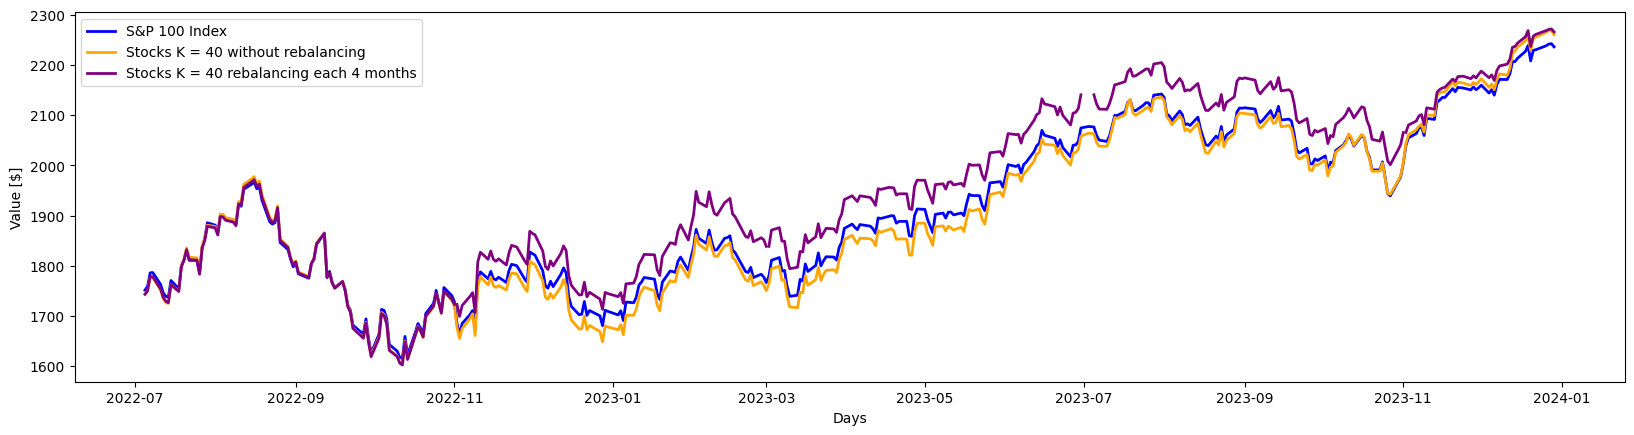

In [36]:
plt.figure().set_figwidth(20)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    index_historical_test.drop(index_historical_test.index[0]),
    label="S&P 100 Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w0, index_historical_test
    ),
    label="Stocks K = " + str(40) + " without rebalancing",
    linewidth=2,
    color="orange",
)

for pos in range(5):
    if pos == 0:
        plt.plot(
            (
                index_stocks_test_P[pos][0].drop(index_stocks_test_P[pos][0].index[0])
            ).index,
            get_all_selected_stocks_accumulated_return(
                index_stocks_test_P[pos][1],
                w_allocation[pos],
                index_stocks_test_P[pos][0],
            ),
            label="Stocks K = " + str(40) + " rebalancing each 4 months",
            linewidth=2,
            color="purple",
        )
        last_vector = get_all_selected_stocks_accumulated_return(
            index_stocks_test_P[pos][1], w_allocation[pos], index_stocks_test_P[pos][0]
        )
    else:
        plt.plot(
            (
                index_stocks_test_P[pos][0].drop(index_stocks_test_P[pos][0].index[0])
            ).index,
            get_all_selected_stocks_accumulated_return_rebalanceamento(
                index_stocks_test_P[pos][1],
                w_allocation[pos],
                index_stocks_test_P[pos][0],
                last_vector[last_vector.index.max()],
            ),
            linewidth=2,
            color="purple",
        )
        last_vector = get_all_selected_stocks_accumulated_return_rebalanceamento(
            index_stocks_test_P[pos][1],
            w_allocation[pos],
            index_stocks_test_P[pos][0],
            last_vector[last_vector.index.max()],
        )

plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")